<a href="https://colab.research.google.com/github/wookylee/kruskalAlgorithm/blob/master/MLE_with_gaussianDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
7418.97
6772.21
5759.52
6650.23
3830.06
3499.64
2815.29
3381.66
812673.42
1283805.42
1039058.01
1045178.95
403165.75
555912.06
464591.81
474556.54
             Hippocampus  Entorhinal
Hippocampus    812673.42   255492.22
Entorhinal     255492.22   403165.75
             Hippocampus  Entorhinal
Hippocampus   1283805.42   526573.16
Entorhinal     526573.16   555912.06
             Hippocampus  Entorhinal
Hippocampus   1039058.01   426044.04
Entorhinal     426044.04   464591.81
             Hippocampus  Entorhinal
Hippocampus   1045178.95   402703.14
Entorhinal     402703.14   474556.54
608138.65
3091
10769
1426
5896


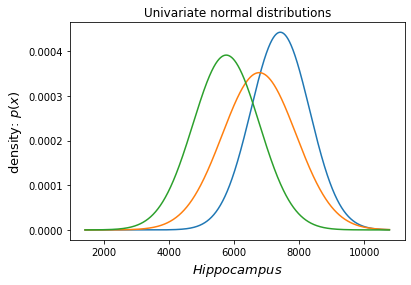

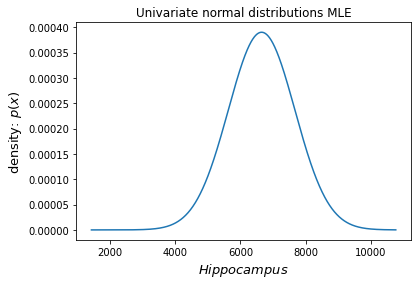

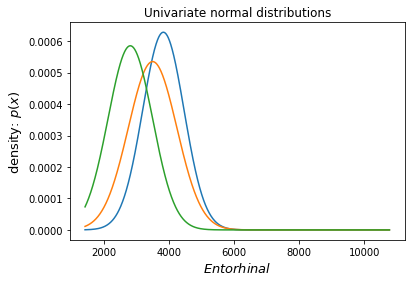

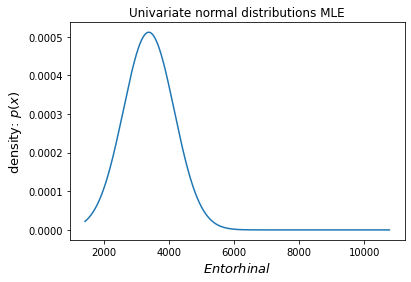

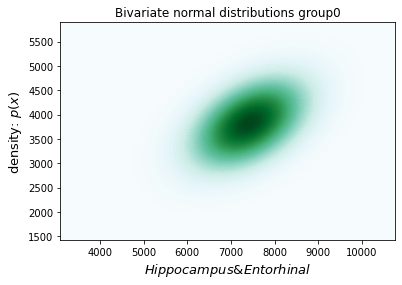

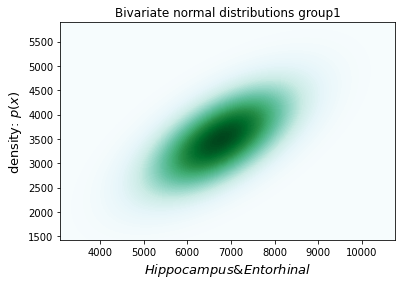

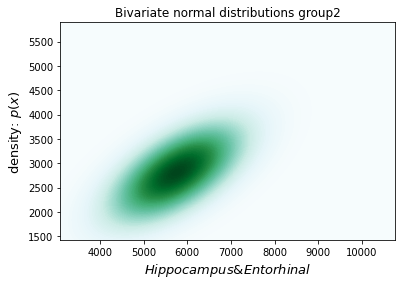

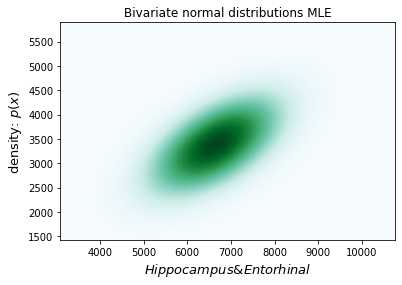

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

filename = '/content/drive/My Drive/뇌및머신러닝/alzheimers_disease_dataset.csv'
data = pd.read_csv(filename)


meanH_group0 = round(data[data.Class ==0].Hippocampus.mean(),2)
print(meanH_group0)
meanH_group1 = round(data[data.Class ==1].Hippocampus.mean(),2)
print(meanH_group1)
meanH_group2 = round(data[data.Class ==2].Hippocampus.mean(),2)
print(meanH_group2)
meanH = round((meanH_group0 + meanH_group1 + meanH_group2)/3 , 2)
print(meanH)
#mean for hippocampus by group

meanE_group0 = round(data[data.Class ==0].Entorhinal.mean(),2)
print(meanE_group0)
meanE_group1 = round(data[data.Class ==1].Entorhinal.mean(),2)
print(meanE_group1)
meanE_group2 = round(data[data.Class ==2].Entorhinal.mean(),2)
print(meanE_group2)
meanE = round((meanE_group0 + meanE_group1 + meanE_group2)/3 , 2)
print(meanE)
#mean for Entorhinal by group 

varH_group0 = round(data[data.Class == 0].Hippocampus.var(),2)
print(varH_group0)
varH_group1 = round(data[data.Class == 1].Hippocampus.var(),2)
print(varH_group1)
varH_group2 = round(data[data.Class == 2].Hippocampus.var(),2)
print(varH_group2)
varH = round((varH_group0 + varH_group1 + varH_group2)/3 , 2)
print(varH)
#var for Hippocampus by group

varE_group0 = round(data[data.Class == 0].Entorhinal.var(),2)
print(varE_group0)
varE_group1 = round(data[data.Class == 1].Entorhinal.var(),2)
print(varE_group1)
varE_group2 = round(data[data.Class == 2].Entorhinal.var(),2)
print(varE_group2)
varE = round((varE_group0 + varE_group1 + varE_group2)/3 , 2)
print(varE)
#var for Entorhinal by group

cov0 = round(data[data.Class == 0].cov(),2)
cov_group0 = cov0.loc['Hippocampus':'Entorhinal','Hippocampus':'Entorhinal']
print(cov_group0)
cov1 = round(data[data.Class == 1].cov(),2)
cov_group1 = cov1.loc['Hippocampus':'Entorhinal','Hippocampus':'Entorhinal']
print(cov_group1)
cov2 = round(data[data.Class == 2].cov(),2)
cov_group2 = cov2.loc['Hippocampus':'Entorhinal','Hippocampus':'Entorhinal']
print(cov_group2)
cov = round((cov_group0+cov_group1+cov_group2)/3, 2)
print(cov)
#cov for Hippocampus and Entorhinal

varE = round(data.Entorhinal.var(),2)
print(varE)
minH = int(data.Hippocampus.min())
print(minH)
maxH = int(data.Hippocampus.max())
print(maxH)
minE = int(data.Entorhinal.min())
print(minE)
maxE = int(data.Entorhinal.max())
print(maxE)
data.head()
# find the min and max for Hippocampus and Entorhinal 




def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance)))
    
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

def generate_surface(mean, covariance, d):
    """Helper function to generate pdf."""
    nb_of_x = 100 # grid size
    x1, x2 = np.meshgrid(np.linspace(minH, maxH, 100), np.linspace(minE, maxE, 100)) # Generate grid
    pdf = np.zeros((100, 100))
    # Fill the cost matrix with weights
    for i in range(100):
        for j in range(100):
            pdf[i,j] = multivariate_normal(np.matrix([[x1[i,j]], [x2[i,j]]]), d, mean, covariance)
    return x1, x2, pdf  



x = np.linspace(minE, maxH, 1500)

plt.figure(1)
plt.plot(
    x, univariate_normal(x, meanH_group0, varH_group0),label="$group0$")
plt.plot(
    x, univariate_normal(x, meanH_group1, varH_group1), 
    label="$group1$")
plt.plot(
    x, univariate_normal(x, meanH_group2, varH_group2), 
    label="$group2$")
plt.xlabel('$Hippocampus$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
# univariate gaussian distribution by group for Hippocampus

plt.figure(2)
plt.plot(
    x, univariate_normal(x, meanH, varH), 
    label="$Hippocampus MLE$")
plt.xlabel('$Hippocampus$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions MLE')
#univariate gaussian distribution by MLE for Hippocampus

plt.figure(3)
plt.plot(
    x, univariate_normal(x, meanE_group0, varE_group0), 
    label="$group0$")
plt.plot(
    x, univariate_normal(x, meanE_group1, varE_group1), 
    label="$group1$")
plt.plot(
    x, univariate_normal(x, meanE_group2, varE_group2), 
    label="$group2$")
plt.xlabel('$Entorhinal$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
#univariate gaussian distribution by group for Entorhinal

plt.figure(4)
plt.plot(
    x, univariate_normal(x, meanE, varE), 
    label="$Entorhinal MLE$")
plt.xlabel('$Entorhinal$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions MLE')
#univariate gaussian distribution by MLE for Entorhinal

plt.figure(5)
bivariate_mean = np.matrix([[meanH_group0], [meanE_group0]])  # Mean
bivariate_covariance = cov_group0  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, 2)
# Plot bivariate distribution when group0
plt.title('Bivariate normal distributions group0')
plt.xlabel('$Hippocampus & Entorhinal$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
con = plt.contourf(x1, x2, p, 100, cmap='BuGn')
#bivariate gaussian distribution by group0 

plt.figure(6)
bivariate_mean = np.matrix([[meanH_group1], [meanE_group1]])  # Mean
bivariate_covariance = cov_group1  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, 2)
# Plot bivariate distribution when group1
plt.title('Bivariate normal distributions group1')
plt.xlabel('$Hippocampus & Entorhinal$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
con = plt.contourf(x1, x2, p, 100, cmap='BuGn')
#bivariate gaussian distribution by group1 

plt.figure(7)
bivariate_mean = np.matrix([[meanH_group2], [meanE_group2]])  # Mean
bivariate_covariance = cov_group2  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, 2)
# Plot bivariate distribution when group2
plt.title('Bivariate normal distributions group2')
plt.xlabel('$Hippocampus & Entorhinal$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
con = plt.contourf(x1, x2, p, 100, cmap='BuGn')
#bivariate gaussian distribution by group2 

plt.figure(8)
bivariate_mean = np.matrix([[meanH], [meanE]])  # Mean
bivariate_covariance = cov  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, 2)
# Plot bivariate distribution
plt.title('Bivariate normal distributions MLE')
plt.xlabel('$Hippocampus & Entorhinal$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
con = plt.contourf(x1, x2, p, 100, cmap='BuGn')
#bivariate gaussian distribution with MLE 
"""
pdf = np.zeros(100,100)
x1,x2 = np.meshgrid()
for i in range of 100:
  for j in range of 100:
    pdf = multivariate_normal(np.matrix([[x1[i,j], [x.,2[i,j]]]), 2, mean, covariance)
bivariate_mean = np.matrix([[meanH_group0],[meanE_group0]])
bivariate_covariance = cov_group0
plt.figure(5)
"""

plt.savefig('univariate_normal_distribution.png')

plt.show()


# 새 섹션